# 1.1 - 3d function plot

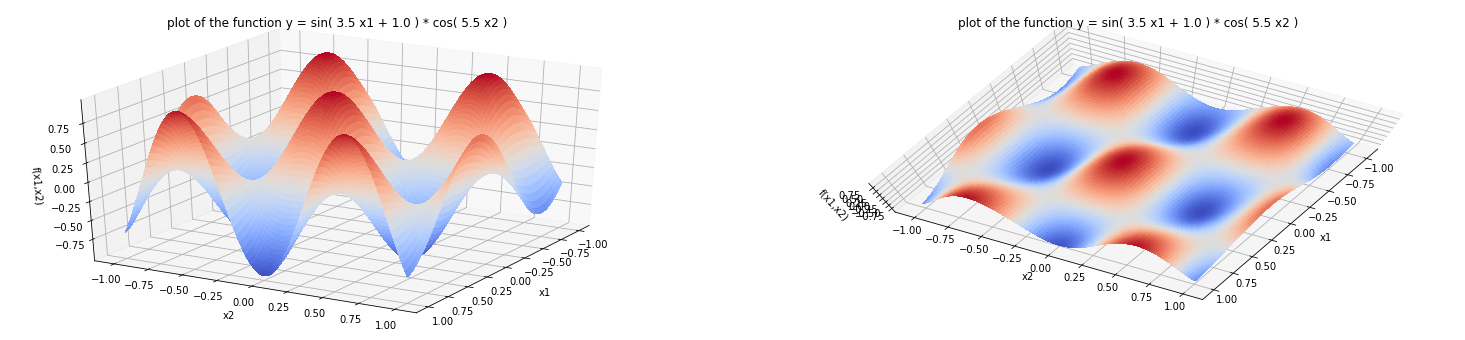

In [ ]:
# The main objective of this task is to train feed-forward multilayer perceptron networks with two hidden layers to approximate
# the following function:
# y = sin( 3.5 x1 + 1.0 ) * cos( 5.5 x2 ), 
# x1, x2 in range[-1, 1]

# Implement the algorithm in a computer language of your choice,
# although you are strongly recommended to use the Python libraries
# used in class.

# 1.1 Visualise the function with a 3D surface plot, in the given
# range. Use of NumPy for numbers is recommended.
#------------------------------------------------------------------------------------

# %reset -f
#use the plot range to do the function here!!!!!!!!!!!!
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
import math

def f(x1,x2):
  return (np.sin(3.5*x1 + 1.0) * np.cos(5.5*x2))
xrange = np.linspace(-1.0, 1.0, 100)
yrange = np.linspace(-1.0, 1.0, 100)
X,Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)

fig = plt.figure(figsize=(26,6))

# surface_plot with color grading
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the function y = sin( 3.5 x1 + 1.0 ) * cos( 5.5 x2 )")

ax.view_init(30,30)
#------------------------------------------------------------------------------------
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the function y = sin( 3.5 x1 + 1.0 ) * cos( 5.5 x2 )")
ax.view_init(80, 30)

# 1.2 - Generate samples, visualise

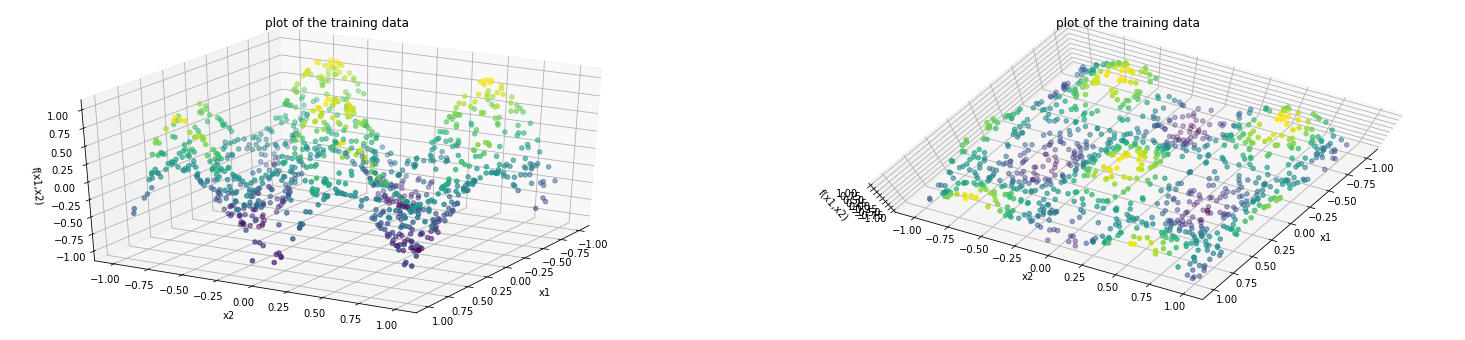

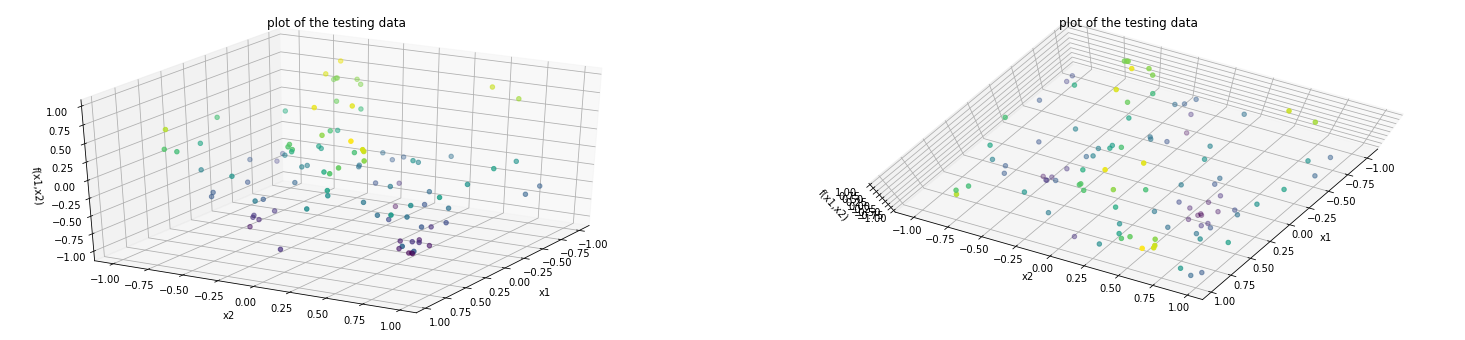

In [ ]:
# 1.2 Randomly generate 1100 samples for x1 and x2 within [-1,1].
# Calculate the corresponding y values for the 1100 samples. Use
# 1000 of them as the training dataset, and the other 100
# samples as a test dataset. It is recommended to store your
# data as a tensor (to make it easier to use in the neural net later), e.g.
# x = torch.as_tensor(data, dtype=torch.double)
# Visualise the training and test data (two separate plots) in a
# three-dimensional graphics,
# e.g. scatter3D(x1, x2, z, c=z). 
#------------------------------------------------------------------------------------
import random
import numpy as np
import torch

#use rand to gen samples for x1 & x2
x1 = np.random.uniform(-1, 1, 1100) #create list of random floats in range [-1,1]
x2 = np.random.uniform(-1, 1, 1100) #with a uniform distribution
#calc y values for this
y = f(x1,x2)

#convert to tensor
NParray3d = np.array((x1, x2, y), dtype="f")#loat)#convert to np 3d array

torchFromNpArray = torch.from_numpy(NParray3d)#convert np array to tensor

training, test = torch.split(torchFromNpArray, 1000, dim=1)


#plot the generated values with 3d plot - can compare later vs previous - plot training
fig = plt.figure(figsize=(26,6))

matplotlib.colors.Normalize(vmin=-1, vmax=1)#normalise the colours
# surface_plot with color grading
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the training data")
ax.scatter3D(training[0,].tolist(), training[1,].tolist(), training[2,].tolist(), c=training[2,].tolist(), marker='o', zorder=10)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the training data")
ax.scatter3D(training[0,].tolist(), training[1,].tolist(), training[2,].tolist(), c=training[2,].tolist(), marker='o', zorder=10)
ax.view_init(80, 30)

#plot test
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the testing data")
ax.scatter3D(test[0,].tolist(), test[1,].tolist(), test[2,].tolist(), c=test[2,].tolist(), marker='o', zorder=10)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the testing data")
ax.scatter3D(test[0,].tolist(), test[1,].tolist(), test[2,].tolist(), c=test[2,].tolist(), marker='o', zorder=10)
ax.view_init(80, 30)

In [ ]:
#transpose from long lists of x1, x2, z -> list of [x1, x2, z] instances/points
training = torch.transpose(training, 0,1)
test = torch.transpose(test, 0,1)

#split data into input and expected output
x = training[:, :2]
y = training[:, 2:]

x_test = test[:, :2]
y_test = test[:, 2:]

# 1.3 - define NN, init

In [ ]:
# 1.3 Assume that the neural network has six hidden neurons in each
# of the hidden layers and the network is fully connected. There
# is a threshold/bias connection for all hidden nodes and the
# output node. The activation function used is a sigmoid
# function in the hidden neurons, and a linear activation
# function in the output neuron. Write the code that creates the
# network 
#------------------------------------------------------------------------------------

# set up the network
class Net(torch.nn.Module):
    # initialise 2 hidden layers and one output layer
    def __init__(self, n_feature, n_hidden, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden2)  # hidden layer
        self.out = torch.nn.Linear(n_hidden2, n_output)  # output layer

    # connect up the layers: the input passes through the hidden, then the sigmoid, 
    #then through hidden2, then the sigmoid, then the output layer
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x)) # activation function for hidden layer
        x = torch.sigmoid(self.hidden2(x))
        x = self.out(x)
        return x

#-----------------data & variables
Features = 2
Output = 1
hidden_neurons = 6
#-----------------------

net = Net(n_feature=Features, n_hidden=hidden_neurons, n_hidden2=hidden_neurons, n_output=Output)
print(net) # net architecture

Net(
  (hidden): Linear(in_features=2, out_features=6, bias=True)
  (hidden2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=1, bias=True)
)


# 1.4 - create functions to:
extract weights from network

put weights into network


In [ ]:
# 1.4 Write the following two functions:
# weightsOutofNetwork: extracts all the weights of the network and puts them in one list; returns this list.

# weightsIntoNetwork: takes as input a list of all weights of the network and uses them to set the weights of the network
# Write a test to check if the weights are retrieved and
# inserted in the network correctly. 
# Show the following test
# results in your report: use weightsOutofNetwork to retrieve
# all weights; print out the first layer of weights (connecting
# input to hidden); change three of these weights; insert all
# weights back in the network using weightsIntoNetwork; use
# weightsOutofNetwork to retrieve all weights again, and print
# out the first layer to check. Highlight the changed weights,
# e.g. in bold.
#------------------------------------------------------------------------------------
import pandas as pd

#extracts all the weights of the network and puts them in one list; returns this list.
def weightsOutofNetwork(net): 
  #weights convert to lists
  networkHiddenWeights = net.hidden.weight.tolist()
  networkHidden2Weights = net.hidden2.weight.tolist()
  networkOutputWeights = net.out.weight.tolist()
  #bias' convert to lists
  networkHiddenBias = net.hidden.bias.tolist()
  networkHidden2Bias = net.hidden2.bias.tolist()
  networkOutputBias = net.out.bias.tolist()
  
  #flatten lists (only need to do the weights)
  flatHiddenWeights = [item for sublist in networkHiddenWeights for item in sublist]
  flatHidden2Weights = [item for sublist in networkHidden2Weights for item in sublist]
  flatOutputWeights = [item for sublist in networkOutputWeights for item in sublist]
  output = []
  output.extend(flatHiddenWeights + flatHidden2Weights + flatOutputWeights 
                + networkHiddenBias + networkHidden2Bias + networkOutputBias)
  return output

#takes as input a list of all weights of the network and uses them to set the weights of the network
def weightsIntoNetwork(net, weightsList): 
  #split
  networkHiddenWeights = weightsList[:12]#2*6
  networkHidden2Weights = weightsList[12:48]#6*6
  networkOutputWeights = weightsList[48:54]#1*6
  networkHiddenBias = weightsList[54:60]#6
  networkHidden2Bias = weightsList[60:66]#6
  networkOutputBias = weightsList[66:67]#1
  #group for neurons
  #make 2d from flat 2 per sub
  networkHiddenWeights = [networkHiddenWeights[n:n+2] for n in range(0, len(networkHiddenWeights), 2)]
  #6 per sub
  networkHidden2Weights = [networkHidden2Weights[n:n+6] for n in range(0, len(networkHidden2Weights), 6)]
  #1 ele in this one
  networkOutputWeights = [networkOutputWeights]

  hiddenWeightsTensor = torch.FloatTensor(networkHiddenWeights)
  hidden2WeightsTensor = torch.FloatTensor(networkHidden2Weights)
  outputWeightsTensor = torch.FloatTensor(networkOutputWeights)

  net.hidden.weight.data = torch.nn.Parameter(hiddenWeightsTensor)
  net.hidden2.weight.data = torch.nn.Parameter(hidden2WeightsTensor)
  net.out.weight.data = torch.nn.Parameter(outputWeightsTensor)
  
  hiddenBiasTensor = torch.FloatTensor(networkHiddenBias)#split into hidden & output bias
  hidden2BiasTensor = torch.FloatTensor(networkHidden2Bias)
  outputBiasTensor = torch.FloatTensor(networkOutputBias)

  net.hidden.bias = torch.nn.Parameter(hiddenBiasTensor)
  net.hidden2.bias = torch.nn.Parameter(hidden2BiasTensor)
  net.out.bias = torch.nn.Parameter(outputBiasTensor)
  return True

def weightsMethodsTest(net):
  #use weightsOutofNetwork to retrieve all weights;
  weightsList = weightsOutofNetwork(net)
  dfOLD = pd.DataFrame(weightsList[:12], columns = ['before'])
  dfOLD.index.names = ['index']
  #change three of these weights;
  weightsList[0] = 0.0#1d address instead of lists within lists
  weightsList[1] = 0.0
  weightsList[2] = 0.0
  #insert all weights back in the network using weightsIntoNetwork;
  weightsIntoNetwork(net, weightsList)
  #use weightsOutofNetwork to retrieve all weights again, and print out the first layer to check. 
  newWeightsList = weightsOutofNetwork(net)

  dfOLD['after'] = newWeightsList[:12]
  #Highlight the changed weights, e.g. in bold.
  display(dfOLD.style.apply(lambda x: ["font-weight: bold" if x.name in [0,1,2] else '' for i in x], axis=1))
  
weightsMethodsTest(net)

,before,after
index,,
0,-0.497562,0.000000
1,-0.367764,0.000000
2,0.218173,0.000000
3,0.145250,0.145250
4,0.640360,0.640360
5,0.276169,0.276169
6,0.523936,0.523936
7,0.223385,0.223385
8,-0.573632,-0.573632


# 1.5 - GA

Transpose and split data to be used in determining network loss

In [ ]:
# 1.5 Use a binary coded genetic algorithm (with Gray coding) for
# optimising the weights of the neural network to fit the
# function, by minimising the mean squared error on the training
# dataset. Your evaluation function should extract weights from
# the chromosome and insert all weights in the network using
# weightsIntoNetwork, the loss of the network on the training
# data should then be used as the fitness of the individual.
# Use 30 bits for encoding each weight and limit weights to the
# range [-20,20]. It will help to initialise your individuals to
# a smaller range (e.g. [-1,1]).
# Experiment with hyperparameters to get a good result. Show
# your complete code, with hyperparameters clearly named at the
# top. Give a brief justification for your choice of
# hyperparameters.
# Show a plot of the training and test error across the
# generations.
#------------------------------------------------------------------------------------
!pip install deap

import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from sympy.combinatorics.graycode import bin_to_gray
from deap import creator, base, tools, algorithms

#define loss func for network
loss_func = torch.nn.MSELoss()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

#--------------------------------------------------------------------
popSize     = 50#100 #Population size
dimensions   = (((Features + 1) * hidden_neurons) + ((hidden_neurons + 1) * hidden_neurons) + ((hidden_neurons + 1) * Output))#67 #Number of decision variable x - (number of numbers)
numOfBits   = 30#Number of bits in the chromosomes, to represent the numbers
iterations  = 10000#5000#500 #Number of generations to be run
dspInterval = 10
nElitists   = 5 #1 #number of elite individuals selected
mateBitProb_indpb = 0.9
flipProb    =1. / (dimensions * numOfBits) #bit mutate prob #THIS IS A VERY SMALL NUMBER - probably causing it to get stuck #1/100#
maxnum      = 2**numOfBits -1 #absolute max size of number coded by binary list 1,0,0,1,1,....
#--------------------------------------------------------------------
# crossProb = #1 #0.7
# mutateprob = #1 #0.7

toolbox = base.Toolbox()

# Attribute generator 
# define 'attr_bool' to be an attribute ('gene')
# which corresponds to integers sampled uniformly
#from the range [0,1] (i.e. 0 or 1 with equal probability)
toolbox.register("attr_bool", random.randint, 0, 1) #randomise binary init

#--------------------------------------------------------------------custom pop init

def intToGreyBin(intNum):
  binary = "{0:030b}".format(intNum)#get 30 bit binary for int number
  grayBinary = bin_to_gray(binary)#convert the binary to grey
  return list(map(int, list(grayBinary)))#convert grey bits string to int list

def customGen():#initialise your individuals to a smaller range (e.g. [-1,1]).
    individual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)#Generate an individual
    weights = [individual[x:x+numOfBits] for x in range(0, len(individual), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#Split the individual into its weights
    weightsBinList = []
    for weight in weights:#takes in binary list for a weight
        indasstring = "".join(map(str, weight))#create binary string from int list
        degray = gray_to_bin(indasstring)#convert grey encoding to binary
        numasint = int(degray, 2)#create int from binary
        numinrange=-20+40*numasint/(maxnum)#find the scaled float from int
        scaled = ((19 * maxnum) + (2 * numasint))/ 40#scale the int to use the -1,1 scaling
        if(numinrange<0):#use ceil on -, and floor on +, otherwise its out of range very slightly
          roundInt =  math.ceil(scaled)#round towards zero to stay within range
        else:
          roundInt =  math.floor(scaled)
        greyBin = intToGreyBin(roundInt)#Convert the int to gray
        weightsBinList.extend(greyBin)
    return creator.Individual(weightsBinList)

toolbox.register("individual", customGen)#register the individuals to be generated using my custom function
#--------------------------------------------------------------------

# Structure initializers

#define 'individual' to be an individual consisting of numOfBits*dimensions 'attr_bool' elements ('genes')#pop def - redefine to custom gen
# toolbox.register("individual", tools.initRepeat, creator.Individual, 
#     toolbox.attr_bool, numOfBits*dimensions)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/(maxnum)#change range
    return numinrange #Decoding enforces the boundry [-20,20]

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(indi):
    chunks = [indi[x:x+numOfBits] for x in range(0, len(indi), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#split into lists of binary for each variable

    return list(map(chrom2real, chunks))#convert binary lists to real with assumed grey encoding

# the goal ('fitness') function to be maximized
def eval_NN(individual):
    sep = separatevariables(individual)#get weights
    weightsIntoNetwork(net, sep)#input weights into the net
    out = net(x) #calc output of indi on data
    loss = loss_func(out, y).item()#calc loss (will be single item tensor)
    individual.loss = loss#add as attribute for later
    return 1.0/(0.01+loss),#use loss to eval the indi, DEAP doesn't allow minimisation for roulette selection, so we convert to maximisation
                         
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_NN)
# register the crossover operator
toolbox.register("mate", tools.cxUniform, indpb=mateBitProb_indpb)
# register a mutation operator with a probability to flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')
#----------

     |████████████████████████████████| 160 kB 13.9 MB/s 


Gen code:

In [ ]:
with torch.no_grad():
  # def main():
  #random.seed(64)
  # create an initial population of individuals (where each individual is a list of integers)
  pop = toolbox.population(n=popSize)
 
  # Evaluate the entire population
  fitnesses = list(map(toolbox.evaluate, pop))
  for ind, fit in zip(pop, fitnesses):
      ind.fitness.values = fit

  print("  Evaluated %i individuals" % len(pop))

  # fits = [ind.fitness.values[0] for ind in pop]# Extracting all the fitnesses

  g = 0# Variable keeping track of the number of generations
  bestIndiList = []
  # Begin the evolution
  while g < iterations:
      g = g + 1 # A new generation
      print("-- Generation %i --" % g)
      # Select the next generation individuals
      offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
      offspring = list(map(toolbox.clone, offspring))# Clone the selected individuals

      # Apply crossover and mutation on the offspring
      # make pairs of offspring for crossing over
      for child1, child2 in zip(offspring[::2], offspring[1::2]):
          # if random.random() < crossProb:# cross two individuals with probability CXPB
            toolbox.mate(child1, child2)
            # fitness values of the children must be recalculated later
            del child1.fitness.values
            del child2.fitness.values

      for mutant in offspring:
          # if random.random() < mutateprob: # mutate an individual with probability mutateprob
            toolbox.mutate(mutant)
            del mutant.fitness.values

      # Evaluate the individuals with an invalid fitness
      invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      fitnesses = map(toolbox.evaluate, invalid_ind)
      for ind, fit in zip(invalid_ind, fitnesses):
          ind.fitness.values = fit
      
      #print("  Evaluated %i individuals" % len(invalid_ind))
      pop[:] = offspring # The population is entirely replaced by the offspring
      bestIndiList.append(tools.selBest(pop, 1)[0])
      if g%dspInterval ==0:
          # Gather all the fitnesses in one list and print the stats
          fits = [ind.fitness.values[0] for ind in pop]
          losses = [ind.loss for ind in pop]

          length = len(pop)
          mean = sum(fits) / length
          sum2 = sum(x*x for x in fits)
          std = abs(sum2 / length - mean**2)**0.5
          meanloss = sum(losses) / len(losses)

          print("  Min %s" % min(fits))
          print("  Max %s" % max(fits))
          print("  Avg %s" % mean)
          print("  Std %s" % std)

          print("  Avg loss %s" % meanloss)
          print("  lowest loss %s" % min(losses))

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print(f"Best individual is: {separatevariables(best_ind)}")
print(f"Best individual fitness is: {best_ind.fitness.values}")
print(f"Best individual loss is: {best_ind.loss}")

sep = separatevariables(best_ind)#get weights of best_ind
weightsIntoNetwork(net, sep)#input weights into the net

# it is good practice to save the network when trained
torch.save(net.state_dict(), 'net_params-1.5-10000.pkl')# save

Streaming output truncated to the last 5000 lines.
  Avg 11.788650562443436
  Std 3.218976185573753
  Avg loss 0.09523178905248642
  lowest loss 0.0604889839887619
-- Generation 6881 --
-- Generation 6882 --
-- Generation 6883 --
-- Generation 6884 --
-- Generation 6885 --
-- Generation 6886 --
-- Generation 6887 --
-- Generation 6888 --
-- Generation 6889 --
-- Generation 6890 --
  Min 1.6968633795761707
  Max 14.189469529489694
  Avg 12.705093426954122
  Std 3.041207818127411
  Avg loss 0.09020641647279262
  lowest loss 0.06047479808330536
-- Generation 6891 --
-- Generation 6892 --
-- Generation 6893 --
-- Generation 6894 --
-- Generation 6895 --
-- Generation 6896 --
-- Generation 6897 --
-- Generation 6898 --
-- Generation 6899 --
-- Generation 6900 --
  Min 1.3679171962219039
  Max 14.190767241311754
  Avg 12.50729759451789
  Std 2.8194676347829275
  Avg loss 0.08716816172003745
  lowest loss 0.06046835333108902
-- Generation 6901 --
-- Generation 6902 --
-- Generation 6903 --
--

Test to see if pop rescale [-20, 20] -> [-1,1] works as intended

In [ ]:
#TEST FOR THE POP INIT RESCALE
individual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)

# maxnum = 2**30# - 1 #fix my +20 problem, it shifts the rest by an insignificant amount
# print(separatevariables(individual))

maxnum = 2**30 - 1 #fix my +20 problem

print(separatevariables(individual))

individual[:30] = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#20
individual[30:60] = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#0
individual[60:90] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#-20

print(separatevariables(individual))

weights = [individual[x:x+numOfBits] for x in range(0, len(individual), numOfBits)]#same as split


def intToBin(intNum):
  binary = "{0:030b}".format(intNum)#get 30 bit binary for int number
  grayBinary = bin_to_gray(binary)#convert the binary to grey
  return list(map(int, list(grayBinary)))

def customGen(individual):#initialise your individuals to a smaller range (e.g. [-1,1]).
    # individual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)#Generate an individual
    # weights = np.split(np.array(individual), dimensions)#Split the individual into its weights
    final_ind = []
    for weight in weights:
        indasstring = "".join(map(str, weight))
        degray = gray_to_bin(indasstring)
        numasint = int(degray, 2)
        numinrange=-20+40*numasint/(maxnum)
        scaled = ((19 * maxnum) + (2 * numasint))/ 40#scale the int to use the -1,1 scaling
        if(numinrange<0):#use ceil on -, and floor on +, otherwise its out of range very slightly
          trans =  math.ceil(scaled)
        else:
          trans =  math.floor(scaled)
        # print(trans)
        ind_trans = intToBin(trans)#Convert the int to gray
        # print(ind_trans)
        final_ind.extend(ind_trans) 
    return creator.Individual(final_ind)

print(customGen(weights))
print(separatevariables(customGen(weights)))

[17.304423746936415, 0.6958274736030283, -14.312503705092244, -3.406243271572741, 12.41731117704633, 2.701165883523565, 2.5764909596894796, -8.562177893297912, -13.263631046995176, 1.7870306799067457, -14.094131508929777, -13.96215360049359, -9.465535683059633, -0.7530062838951181, -2.740765421409872, -13.397292786647839, -9.584093680217949, -12.528688118354127, -15.235303971204258, 1.6842878439317346, 4.800958358497319, -8.125400010613166, 2.3922048345135565, 7.750241707777828, 7.4135196836791195, 14.006992498419244, -17.67891350917417, -15.024501937464347, -19.755446538101367, -1.5533881462676327, 4.950195238879132, -18.623750543802743, -15.764220576513765, 10.41754669548715, -5.57591086772821, 3.502028643621159, -9.865348478653793, 5.6633780018085425, -17.104343433961592, 4.614117205714916, 9.979902794565916, 11.39294414910762, 14.714013780200865, 14.026402825514232, 5.769676068583202, 11.885964229596745, 16.269575689239034, 16.44215616997532, 16.68144616920636, -17.10517279534151, 

Plot loss across generations

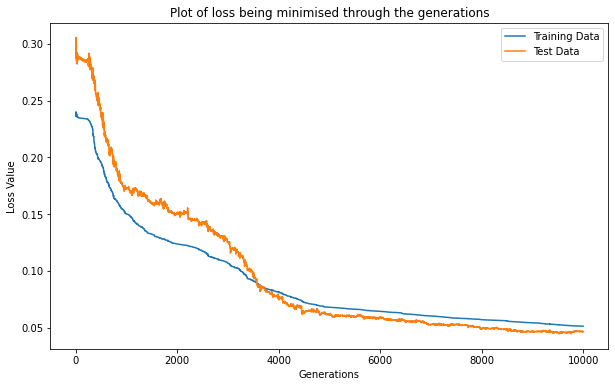

<All keys matched successfully>

In [ ]:
#plot training and test data loss across the generations
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))#make the figs larger

#calc testing loss for best indi's
testingLossOverGens = []
for indi in bestIndiList:
  sep = separatevariables(indi)#get weights
  #input weights into the net
  weightsIntoNetwork(net, sep)
  out = net(x_test) #calc output of indi on data
  testingLossOverGens.append(loss_func(out, y_test).item())#calc loss (will be single item tensor)

plt.xlabel('Generations')
plt.ylabel('Loss Value')
plt.title("Plot of loss being minimised through the generations")
plt.plot(range(0,len(bestIndiList)), [indi.loss for indi in bestIndiList], label = "label_name" )#loss of best indi across generations on training data
plt.plot(range(0,len(bestIndiList)), testingLossOverGens, label = "label_name" )#loss of best indi across generations on training data
plt.legend(["Training Data", "Test Data"])

plt.show()

#loads model from network parameters file
net.load_state_dict(torch.load('net_params-1.5-10000.pkl'))

# 1.6 - 3d surface plot

Plot 3d graph to show predictions across the space

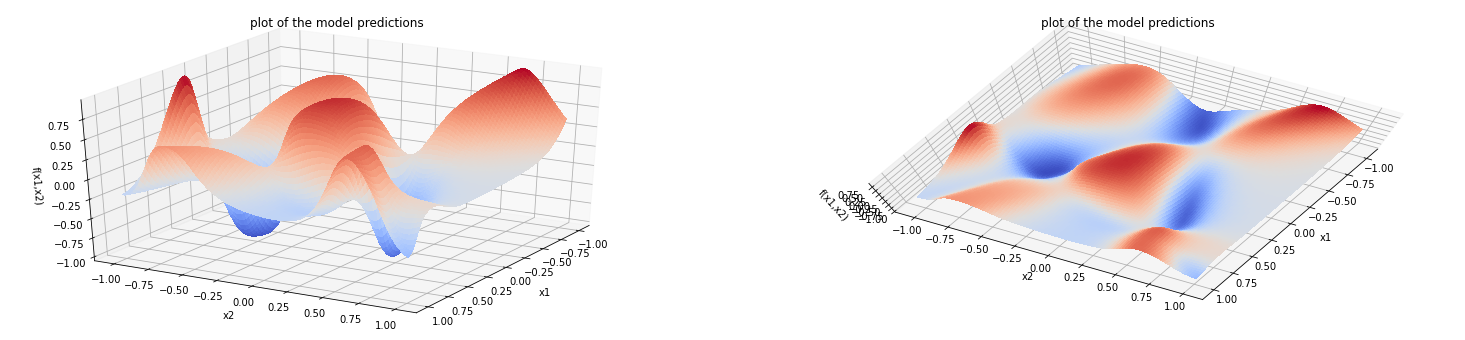

In [ ]:
# 1.6 Show a 3D surface plot of the function implemented by the
# neural network across the range [-1,1]. To do this compute the
# network’s output for a grid of values uniformly covering the
# range. i.e. similar to 1.1 except using network output instead
# of the mathematical function. 
#------------------------------------------------------------------------------------

# Uniform distribution for x1 and x2
xrange_net = np.linspace(-1.0, 1.0, 100)
yrange_net = np.linspace(-1.0, 1.0, 100)

XX, YY = np.meshgrid(xrange_net, yrange_net)#create lists of points in range, multidimensional

grid=np.c_[XX.ravel(),YY.ravel()]#make list of points (x,y)

grid = torch.nn.Parameter(torch.from_numpy(grid)).float()

output = net(grid)

output = output.detach().numpy()#output

output = output.reshape(100, 100)#for surface plot

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)

ax.view_init(80, 30)

# 1.7 - create functions to take weights and convert to chromesome

In [ ]:
# 1.7 Write a function which takes a list of weights (output from
# weightsOutofNetwork) and returns a chromosome (i.e. a long
# list of binary bits, in Gray coding). The function should
# check if weights need to be pushed back into the range
# [-20,20]. Write a test to test your function: test if weights
# can be put into a chromosome, and retrieved, and turned back
# into weights. Show the results of your test for a small number
# of weights. Note that numbers retrieved will not be exactly
# the same as those input because of a loss of accuracy in
# conversion.
#------------------------------------------------------------------------------------

from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from sympy.combinatorics.graycode import bin_to_gray
from math import copysign, floor

def floatToGreyBin(real):
  numasint = int((real + 20)*maxnum/40)
  binary = "{0:030b}".format(numasint)#get 30 bit binary for int number
  grayBinary = bin_to_gray(binary)#convert the binary to grey
  return list(map(int, list(grayBinary)))#convert grey bits string to int list

def weightsToChromesome(weights):
  for i in range(len(weights)):
    if abs(weights[i])>20.0:
      weights[i] = copysign(20.0, weights[i])
  #for each weight, convert to binary - grey coding 
  converted = list(map(floatToGreyBin, weights))#outputs list of binary ints
  newList = []
  for binaryList in converted:#for each sublist (set of binary digits as ints)
    newList.extend(binaryList)
  return newList#(long list of binary digits)


def testWeightsToChrome():
  # test if weights can be put into a chromosome, 
  newIndividual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)
  print("New generated individual:\n" ,separatevariables(newIndividual)[:5])#show init state
  #create and show example new weights
  exampleWeights = [0.3048525194682661, -16.96132097110275, 2.2844643725868927, 
                    3.5078399102276556, 4.804318719361273, -0.6105197040462116, 
                    -12.911729433491574, -9.267809120256276, 13.80144897271083, 
                    -19.732151776302747, 5.430746549210276, 9.036300097625983, 
                    9.463882995270083, 9.85683991560418, -3.759001366569663, 
                    -0.4379683923329871, -4.692016266930864, -17.025148269743795, 
                    -9.49207252775512, -7.7763362860086716, 1.4607111564471502, 
                    1.8242387676837275, 0.4930072468640354, -18.310322871720718, 
                    -18.891501760940535, -0.4248669933759288, 3.202203273030186, 
                    1.585105528668599, -1.274003220045941, -2.6769892337517724, 
                    -13.060985499118441, -8.929583531738801, 19.940367825273768, 
                    -4.061361908969806, 3.5197488437590643, -6.036598110605588, 
                    -15.263021360396428, -15.517594102320814, -7.281092989520257, 
                    -0.4624072280362306, 5.075961747277493, 9.904875298873407, 
                    -12.011306799958746, 7.1698300793486, 1.45012917132129, 
                    2.932314074535217, -19.64151043411485, 1.4097033267931103, 
                    -4.852820322711784, -0.38245966693615685, -0.6726772530681231, 
                    -0.18329566361689587, 1.1137211891950294, -0.43581849004683804, 
                    -13.926585012978489, -0.7333112328623521, 0.8751737148269783, 
                    -1.5862140260508397, 3.2306802489149185, 0.8387139633658478, 
                    -4.685388975483727, 2.632009035564966, -0.7114095061192387, 
                    -8.998795290476451, -0.04593251277313826, -3.428703605596631, 
                    0.26085915068244603]
  print("New weights to go into the individual:\n" ,exampleWeights[:5])
  newIndividual = weightsToChromesome(exampleWeights)#put weights in chromesome
  print("Individual new weights:\n",separatevariables(newIndividual)[:5])#get new bits and convert to weights

testWeightsToChrome()#call test


New generated individual:
 [9.779511568862489, 15.212230640661183, 8.335996780857442, -1.4490734613026248, -18.04737124410213]
New weights to go into the individual:
 [0.3048525194682661, -16.96132097110275, 2.2844643725868927, 3.5078399102276556, 4.804318719361273]
Individual new weights:
 [0.3048525194682661, -16.96132097110275, 2.2844643725868927, 3.5078399102276556, 4.804318719361273]


# 1.8 - GA with Rprop lifetime learning

In [ ]:
# 1.8 Embed the Rprop learning in the genetic algorithm as a local
# search method (lifetime learning). Use the Lamarckian learning
# approach, i.e., the weight changes in the lifetime learning
# are encoded back to the genotype. Implement 30 iterations of
# local search in each generation. Implement the above memetic
# algorithm by extending the code above. Explain hyperparameter
# choices. Show a plot of the training and test error across the
# generations, and also a 3D surface plot of the function
# implemented by the neural network across the range [-1,1]. 
#------------------------------------------------------------------------------------
!pip install deap

import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from sympy.combinatorics.graycode import bin_to_gray
from deap import creator, base, tools, algorithms

#define loss func for network
loss_func = torch.nn.MSELoss()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

#--------------------------------------------------------------------
popSize     = 50#100 #Population size
dimensions   = (((Features + 1) * hidden_neurons) + ((hidden_neurons + 1) * hidden_neurons) + ((hidden_neurons + 1) * Output))#67 #Number of decision variable x - (number of numbers)
numOfBits   = 30#Number of bits in the chromosomes, to represent the numbers
iterations  = 100#5000#500 #Number of generations to be run
dspInterval = 10
nElitists   = 5 #1 #number of elite individuals selected
mateBitProb_indpb = 0.9
flipProb    =1. / (dimensions * numOfBits) #bit mutate prob #THIS IS A VERY SMALL NUMBER - probably causing it to get stuck #1/100#
maxnum      = 2**numOfBits -1 #absolute max size of number coded by binary list 1,0,0,1,1,....
#--------------------------------------------------------------------
# crossProb = 1 #0.7
# mutateprob = 1 #0.7

toolbox = base.Toolbox()

# Attribute generator 
# define 'attr_bool' to be an attribute ('gene')
# which corresponds to integers sampled uniformly
#from the range [0,1] (i.e. 0 or 1 with equal probability)
toolbox.register("attr_bool", random.randint, 0, 1) #randomise binary init

#--------------------------------------------------------------------custom pop init

def intToGreyBin(intNum):
  binary = "{0:030b}".format(intNum)#get 30 bit binary for int number
  grayBinary = bin_to_gray(binary)#convert the binary to grey
  return list(map(int, list(grayBinary)))#convert grey bits string to int list

def customGen():#initialise your individuals to a smaller range (e.g. [-1,1]).
    individual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)#Generate an individual
    weights = [individual[x:x+numOfBits] for x in range(0, len(individual), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#Split the individual into its weights
    weightsBinList = []
    for weight in weights:#takes in binary list for a weight
        indasstring = "".join(map(str, weight))#create binary string from int list
        degray = gray_to_bin(indasstring)#convert grey encoding to binary
        numasint = int(degray, 2)#create int from binary
        numinrange=-20+40*numasint/(maxnum)#find the scaled float from int
        scaled = ((19 * maxnum) + (2 * numasint))/ 40#scale the int to use the -1,1 scaling
        if(numinrange<0):#use ceil on -, and floor on +, otherwise its out of range very slightly
          roundInt =  math.ceil(scaled)#round towards zero to stay within range
        else:
          roundInt =  math.floor(scaled)
        greyBin = intToGreyBin(roundInt)#Convert the int to gray
        weightsBinList.extend(greyBin)
    return creator.Individual(weightsBinList)

toolbox.register("individual", customGen)#register the individuals to be generated using my custom function
#--------------------------------------------------------------------

# Structure initializers

#define 'individual' to be an individual consisting of numOfBits*dimensions 'attr_bool' elements ('genes')#pop def - redefine to custom gen
# toolbox.register("individual", tools.initRepeat, creator.Individual, 
#     toolbox.attr_bool, numOfBits*dimensions)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/(maxnum)#change range
    return numinrange #Decoding enforces the boundry [-20,20]

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(indi):
    chunks = [indi[x:x+numOfBits] for x in range(0, len(indi), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#split into lists of binary for each variable

    return list(map(chrom2real, chunks))#convert binary lists to real with assumed grey encoding

# the goal ('fitness') function to be maximized
def eval_NN(individual):
    #put individual into network
    sep = separatevariables(individual)#get weights
    weightsIntoNetwork(net, sep)#input weights into the net
    optimizer = torch.optim.Rprop(net.parameters(), lr=0.01)
    # An iternation of 30 times for optimizer over each generation
    for i in range(30):
      out = net(x)# input x and predict based on x
      loss_optimizer = loss_func(out, y)
      optimizer.zero_grad()# clear gradients for next train, zero the gradient buffers
      loss_optimizer.backward()# backpropagation, compute gradients
      optimizer.step()# Does the update, apply gradients
    # put changes in network into individual
    lifetimeLearningWeights = weightsOutofNetwork(net)
    individual[:] = weightsToChromesome(lifetimeLearningWeights)
    #calc new fitness
    out = net(x) #calc output of indi on data
    loss = loss_func(out, y).item()#calc loss (will be single item tensor)
    # print(loss)
    individual.loss = loss#add as attribute for later
    return 1.0/(0.01+loss),#use loss to eval the indi, DEAP doesn't allow minimisation for roulette selection, so we convert to maximisation
                         
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_NN)
# register the crossover operator
toolbox.register("mate", tools.cxUniform, indpb=mateBitProb_indpb)
# register a mutation operator with a probability to flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')
#----------

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Gen code:

In [ ]:
# with torch.no_grad():#dont need so the requires_grad flags are not set to false.
# def main():
#random.seed(64)
# create an initial population of individuals (where each individual is a list of integers)
pop = toolbox.population(n=popSize)

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

print("  Evaluated %i individuals" % len(pop))

# fits = [ind.fitness.values[0] for ind in pop]# Extracting all the fitnesses

g = 0# Variable keeping track of the number of generations
bestIndiList = []
# Begin the evolution
while g < iterations:
    g = g + 1 # A new generation
    print("-- Generation %i --" % g)

  # #------------------------------------------------------------------------
  # #or here
  # for ind in pop:
  #   optimizer = torch.optim.Rprop(net.parameters(), lr=0.01)
  #   #put ind into network
  #   sep = separatevariables(ind)#get weights
  #   #input weights into the net
  #   weightsIntoNetwork(net, sep)
  #   # An iternation of 30 times for optimizer over each generation
  #   for i in range(30):
  #     # zero the gradient buffers
  #     out = net(x)
  #     loss_optimizer = loss_func(out, y)
  #     optimizer.zero_grad()
  #     loss_optimizer.backward()
  #     optimizer.step()        # Does the update
  #   # put changes in network into ind
  #   lifetimeLearningWeights = weightsOutofNetwork(net)
  #   ind[:] = weightsToChromesome(lifetimeLearningWeights)
  #   #calc new fitness
  #   fit = toolbox.evaluate( ind)
  #   ind.fitness.values = fit
  # #------------------------------------------------------------------------

    # Select the next generation individuals
    offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
    offspring = list(map(toolbox.clone, offspring))# Clone the selected individuals

    # Apply crossover and mutation on the offspring
    # make pairs of offspring for crossing over
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # if random.random() < crossProb:# cross two individuals with probability CXPB
          toolbox.mate(child1, child2)
          # fitness values of the children must be recalculated later
          del child1.fitness.values
          del child2.fitness.values

    for mutant in offspring:
        # if random.random() < mutateprob: # mutate an individual with probability mutateprob
          toolbox.mutate(mutant)
          del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    #print("  Evaluated %i individuals" % len(invalid_ind))
    pop[:] = offspring # The population is entirely replaced by the offspring
    bestIndiList.append(tools.selBest(pop, 1)[0])
    if g%dspInterval ==0:
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        losses = [ind.loss for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        meanloss = sum(losses) / len(losses)

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

        print("  Avg loss %s" % meanloss)
        print("  lowest loss %s" % min(losses))

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print(f"Best individual is: {separatevariables(best_ind)}")
print(f"Best individual fitness is: {best_ind.fitness.values}")
print(f"Best individual loss is: {best_ind.loss}")

sep = separatevariables(best_ind)#get weights of best_ind
weightsIntoNetwork(net, sep)#input weights into the net

# it is good practice to save the network when trained
torch.save(net.state_dict(), 'net_params-1-8-100.pkl')# save

  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 3.9260923530931997
  Max 12.80765682358581
  Avg 8.965034097791689
  Std 1.9979876939465684
  Avg loss 0.10811157077550888
  lowest loss 0.06807829439640045
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 8.21274274952087
  Max 29.514611896635458
  Avg 24.07114325371089
  Std 4.491115261052782
  Avg loss 0.034199658818542956
  lowest loss 0.023881522938609123
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 10.560286516013345
  Max 32.10832689848158
  Avg 2

Graph loss across gens

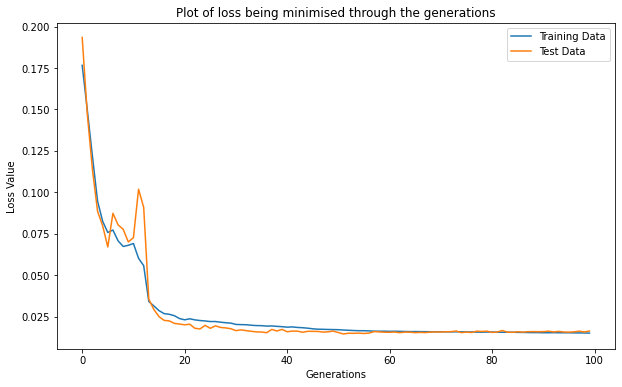

<All keys matched successfully>

In [ ]:
#plot training and test data loss across the generations
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))#make the figs larger

#calc testing loss for best indi's
testingLossOverGens = []
for indi in bestIndiList:
  sep = separatevariables(indi)#get weights
  #input weights into the net
  weightsIntoNetwork(net, sep)
  out = net(x_test) #calc output of indi on data
  testingLossOverGens.append(loss_func(out, y_test).item())#calc loss (will be single item tensor)

plt.xlabel('Generations')
plt.ylabel('Loss Value')
plt.title("Plot of loss being minimised through the generations")
plt.plot(range(0,len(bestIndiList)), [indi.loss for indi in bestIndiList], label = "label_name" )#loss of best indi across generations on training data
plt.plot(range(0,len(bestIndiList)), testingLossOverGens, label = "label_name" )#loss of best indi across generations on training data
plt.legend(["Training Data", "Test Data"])

plt.show()

#loads model from network parameters file
net.load_state_dict(torch.load('net_params-1-8-100.pkl'))

plot 3d the predictions of the network across the space


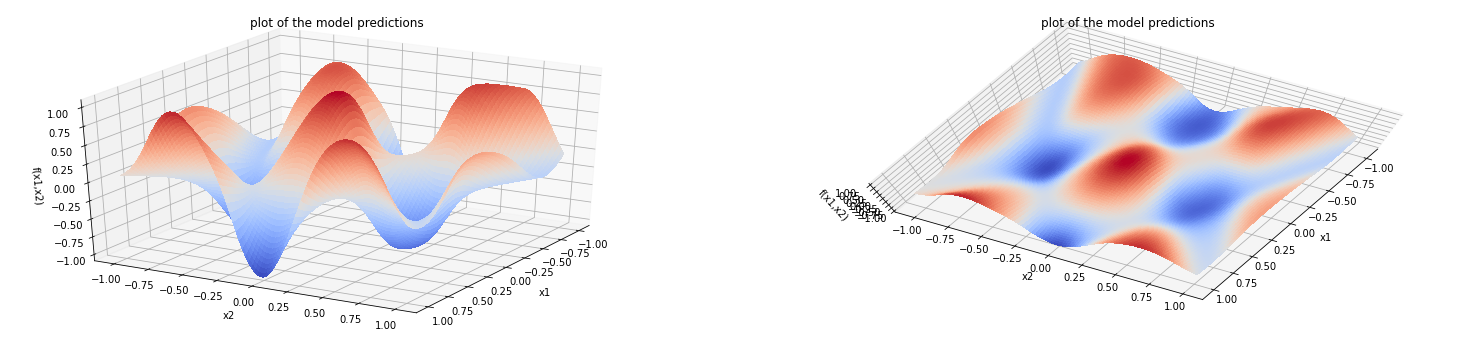

In [ ]:
# Uniform distribution for x1 and x2
xrange_net = np.linspace(-1.0, 1.0, 100)
yrange_net = np.linspace(-1.0, 1.0, 100)

XX, YY = np.meshgrid(xrange_net, yrange_net)#create lists of points in range, multidimensional

grid=np.c_[XX.ravel(),YY.ravel()]#make list of points (x,y)

grid = torch.nn.Parameter(torch.from_numpy(grid)).float()

output = net(grid)

output = output.detach().numpy()#output

output = output.reshape(100, 100)#for surface plot

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)

ax.view_init(80, 30)

# 1.9 - Baldwinian learning approach for GA & Rprop

In [ ]:
# 1.9 Implement the Baldwinian learning approach to replace the
# Lamarckian approach in Question 1.8 and plot the results. Show
# a plot of the training and test error across the generations,
# and also a 3D surface plot of the function implemented by the
# neural network across the range [-1,1]. [6 marks]. 
#------------------------------------------------------------------------------------
!pip install deap

import random
from sympy.combinatorics.graycode import GrayCode
from sympy.combinatorics.graycode import gray_to_bin
from sympy.combinatorics.graycode import bin_to_gray
from deap import creator, base, tools, algorithms

#define loss func for network
loss_func = torch.nn.MSELoss()

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

#--------------------------------------------------------------------
popSize     = 50#100 #Population size
dimensions   = (((Features + 1) * hidden_neurons) + ((hidden_neurons + 1) * hidden_neurons) + ((hidden_neurons + 1) * Output))#67 #Number of decision variable x - (number of numbers)
numOfBits   = 30#Number of bits in the chromosomes, to represent the numbers
iterations  = 2000#5000#500 #Number of generations to be run
dspInterval = 10
nElitists   = 5 #1 #number of elite individuals selected
mateBitProb_indpb = 0.9
flipProb    =1. / (dimensions * numOfBits) #bit mutate prob #THIS IS A VERY SMALL NUMBER - probably causing it to get stuck #1/100#
maxnum      = 2**numOfBits -1 #absolute max size of number coded by binary list 1,0,0,1,1,....
#--------------------------------------------------------------------
# crossProb = 1 #0.7
# mutateprob = 1 #0.7

toolbox = base.Toolbox()

# Attribute generator 
# define 'attr_bool' to be an attribute ('gene')
# which corresponds to integers sampled uniformly
#from the range [0,1] (i.e. 0 or 1 with equal probability)
toolbox.register("attr_bool", random.randint, 0, 1) #randomise binary init

#--------------------------------------------------------------------custom pop init

def intToGreyBin(intNum):
  binary = "{0:030b}".format(intNum)#get 30 bit binary for int number
  grayBinary = bin_to_gray(binary)#convert the binary to grey
  return list(map(int, list(grayBinary)))#convert grey bits string to int list

def customGen():#initialise your individuals to a smaller range (e.g. [-1,1]).
    individual = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimensions)#Generate an individual
    weights = [individual[x:x+numOfBits] for x in range(0, len(individual), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#Split the individual into its weights
    weightsBinList = []
    for weight in weights:#takes in binary list for a weight
        indasstring = "".join(map(str, weight))#create binary string from int list
        degray = gray_to_bin(indasstring)#convert grey encoding to binary
        numasint = int(degray, 2)#create int from binary
        numinrange=-20+40*numasint/(maxnum)#find the scaled float from int
        scaled = ((19 * maxnum) + (2 * numasint))/ 40#scale the int to use the -1,1 scaling
        if(numinrange<0):#use ceil on -, and floor on +, otherwise its out of range very slightly
          roundInt =  math.ceil(scaled)#round towards zero to stay within range
        else:
          roundInt =  math.floor(scaled)
        greyBin = intToGreyBin(roundInt)#Convert the int to gray
        weightsBinList.extend(greyBin)
    return creator.Individual(weightsBinList)

toolbox.register("individual", customGen)#register the individuals to be generated using my custom function
#--------------------------------------------------------------------

# Structure initializers

#define 'individual' to be an individual consisting of numOfBits*dimensions 'attr_bool' elements ('genes')#pop def - redefine to custom gen
# toolbox.register("individual", tools.initRepeat, creator.Individual, 
#     toolbox.attr_bool, numOfBits*dimensions)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Convert chromosome to real number
# input: list binary 1,0 of length numOfBits representing number using gray coding
# output: real value
def chrom2real(c):
    indasstring=''.join(map(str, c))
    degray=gray_to_bin(indasstring)
    numasint=int(degray, 2) # convert to int from base 2 list
    numinrange=-20+40*numasint/(maxnum)#change range
    return numinrange #Decoding enforces the boundry [-20,20]

# input: concatenated list of binary variables
# output: tuple of real numbers representing those variables
def separatevariables(indi):
    chunks = [indi[x:x+numOfBits] for x in range(0, len(indi), numOfBits)]#quicker and same as: np.split(np.array(indi), dimensions)#split into lists of binary for each variable

    return list(map(chrom2real, chunks))#convert binary lists to real with assumed grey encoding

# the goal ('fitness') function to be maximized
def eval_NN(individual):
    # #put individual into network
    sep = separatevariables(individual)#get weights
    weightsIntoNetwork(net, sep)#input weights into the net
    optimizer = torch.optim.Rprop(net.parameters(), lr=0.01)
    # An iternation of 30 times for optimizer over each generation
    for i in range(30):
      out = net(x)# input x and predict based on x
      loss_optimizer = loss_func(out, y)
      optimizer.zero_grad()# clear gradients for next train, zero the gradient buffers
      loss_optimizer.backward()# backpropagation, compute gradients
      optimizer.step()# Does the update, apply gradients
    # dont put changes in network into individual
    lifetimeLearningWeights = weightsOutofNetwork(net)
    individual.newWeights = lifetimeLearningWeights#save for when plotting 3d surface
    #calc new fitness with the new weights stored on the network for the individual
    out = net(x) #calc output of indi on data
    loss = loss_func(out, y).item()#calc loss (will be single item tensor)
    individual.loss = loss#add as attribute for later
    #also calculate the testing loss from the lifetime learning
    testout = net(x_test) #calc output of indi on data
    testloss = loss_func(testout, y_test).item()#calc loss (will be single item tensor)
    individual.testloss = testloss#add as attribute for later
    return 1.0/(0.01+loss),#use loss to eval the indi, DEAP doesn't allow minimisation for roulette selection, so we convert to maximisation
                         
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", eval_NN)
# register the crossover operator
toolbox.register("mate", tools.cxUniform, indpb=mateBitProb_indpb)
# register a mutation operator with a probability to flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=flipProb)
toolbox.register("select", tools.selRoulette, fit_attr='fitness')
#----------

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen code:

In [ ]:
# with torch.no_grad():#dont need so the requires_grad flags are not set to false.
# def main():
#random.seed(64)
# create an initial population of individuals (where each individual is a list of integers)
pop = toolbox.population(n=popSize)

# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

print("  Evaluated %i individuals" % len(pop))

# fits = [ind.fitness.values[0] for ind in pop]# Extracting all the fitnesses

g = 0# Variable keeping track of the number of generations
bestIndiList = []
# Begin the evolution
while g < iterations:
    g = g + 1 # A new generation
    print("-- Generation %i --" % g)

    # #------------------------------------------------------------------------
    # #or here
    # for ind in pop:
    #   optimizer = torch.optim.Rprop(net.parameters(), lr=0.01)
    #   #put ind into network
    #   sep = separatevariables(ind)#get weights
    #   #input weights into the net
    #   weightsIntoNetwork(net, sep)
    #   # An iternation of 30 times for optimizer over each generation
    #   for i in range(30):
    #     # zero the gradient buffers
    #     out = net(x)
    #     loss_optimizer = loss_func(out, y)
    #     optimizer.zero_grad()
    #     loss_optimizer.backward()
    #     optimizer.step()        # Does the update
    #   # dont put changes in network into ind
    #   lifetimeLearningWeights = weightsOutofNetwork(net)
    #   tempind = tools.initRepeat(creator.Individual, toolbox.attr_bool, numOfBits*dimension)
    #   tempind[:] = weightsToChromesome(lifetimeLearningWeights)
    #   #calc new fitness
    #   fit = toolbox.evaluate(tempind)#dont carry on the changes
    #   ind.fitness.values = fit
    # #------------------------------------------------------------------------

    # Select the next generation individuals
    offspring = tools.selBest(pop, nElitists) + toolbox.select(pop,len(pop)-nElitists)
    offspring = list(map(toolbox.clone, offspring))# Clone the selected individuals

    # Apply crossover and mutation on the offspring
    # make pairs of offspring for crossing over
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        # if random.random() < crossProb:# cross two individuals with probability CXPB
          toolbox.mate(child1, child2)
          # fitness values of the children must be recalculated later
          del child1.fitness.values
          del child2.fitness.values

    for mutant in offspring:
        # if random.random() < mutateprob: # mutate an individual with probability mutateprob
          toolbox.mutate(mutant)
          del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    #print("  Evaluated %i individuals" % len(invalid_ind))
    pop[:] = offspring # The population is entirely replaced by the offspring
    bestIndiList.append(tools.selBest(pop, 1)[0])
    if g%dspInterval ==0:
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        losses = [ind.loss for ind in pop]

        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        meanloss = sum(losses) / len(losses)

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)

        print("  Avg loss %s" % meanloss)
        print("  lowest loss %s" % min(losses))

print("-- End of (successful) evolution --")

best_ind = tools.selBest(pop, 1)[0]
print(f"Best individual is: {separatevariables(best_ind)}")
print(f"Best individual fitness is: {best_ind.fitness.values}")
print(f"Best individual loss is: {best_ind.loss}")

sep = separatevariables(best_ind)#get weights of best_ind
weightsIntoNetwork(net, sep)#input weights into the net

# it is good practice to save the network when trained
torch.save(net.state_dict(), 'net_params_1-9-2000.pkl')# save

  Evaluated 50 individuals
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
  Min 4.058612990532929
  Max 4.928834446046154
  Avg 4.276149133786224
  Std 0.2195524575628431
  Avg loss 0.22443392097949982
  lowest loss 0.19288772344589233
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
  Min 4.096384376067163
  Max 5.427897238976132
  Avg 4.6855893093598215
  Std 0.342582522581169
  Avg loss 0.2045350432395935
  lowest loss 0.17423340678215027
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
  Min 4.1759643027326705
  Max 6.2102756799792305
  Avg 5.2

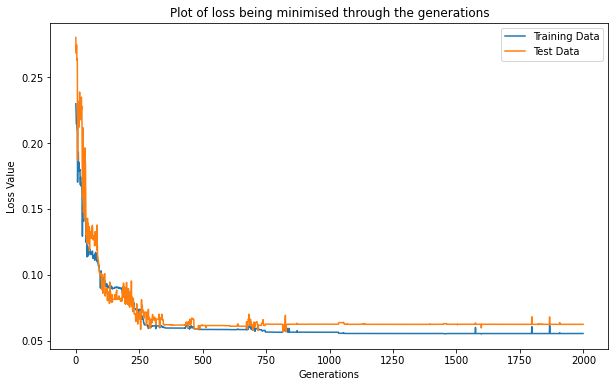

<All keys matched successfully>

In [ ]:
#plot training and test data loss across the generations
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))#make the figs larger

plt.xlabel('Generations')
plt.ylabel('Loss Value')
plt.title("Plot of loss being minimised through the generations")
plt.plot(range(0,len(bestIndiList)), [indi.loss for indi in bestIndiList], label = "label_name" )#loss of best indi across generations on training data
plt.plot(range(0,len(bestIndiList)), [indi.testloss for indi in bestIndiList], label = "label_name" )#loss of best indi across generations on training data
plt.legend(["Training Data", "Test Data"])

plt.show()

#loads model from network parameters file
net.load_state_dict(torch.load('net_params_1-9-2000.pkl'))

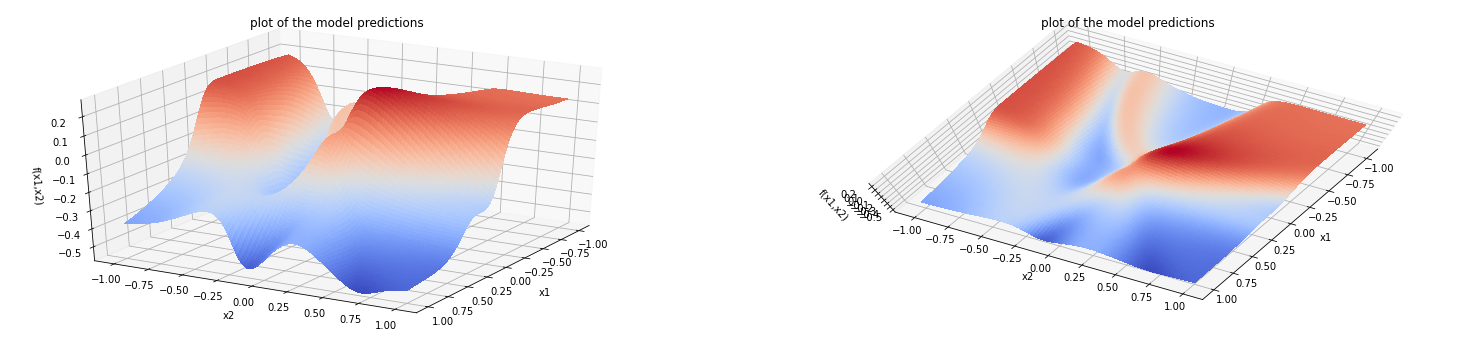

In [ ]:
# Uniform distribution for x1 and x2
xrange_net = np.linspace(-1.0, 1.0, 100)
yrange_net = np.linspace(-1.0, 1.0, 100)

XX, YY = np.meshgrid(xrange_net, yrange_net)#create lists of points in range, multidimensional

grid=np.c_[XX.ravel(),YY.ravel()]#make list of points (x,y)

grid = torch.nn.Parameter(torch.from_numpy(grid)).float()

output = net(grid)

output = output.detach().numpy()#output

output = output.reshape(100, 100)#for surface plot

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)

ax.view_init(80, 30)

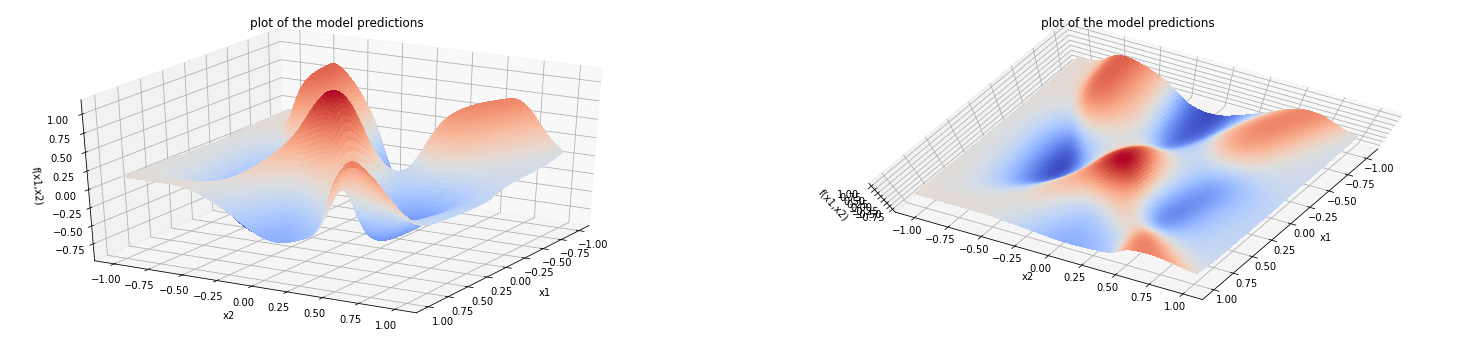

In [ ]:
# Uniform distribution for x1 and x2
xrange_net = np.linspace(-1.0, 1.0, 100)
yrange_net = np.linspace(-1.0, 1.0, 100)

XX, YY = np.meshgrid(xrange_net, yrange_net)#create lists of points in range, multidimensional

grid=np.c_[XX.ravel(),YY.ravel()]#make list of points (x,y)

grid = torch.nn.Parameter(torch.from_numpy(grid)).float()

#take the new lifetime learned weights of the best individual
weightsIntoNetwork(net, best_ind.newWeights)#input weights into the net

output = net(grid)

output = output.detach().numpy()#output

output = output.reshape(100, 100)#for surface plot

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)
ax.view_init(30,30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=10)
ax.set_zlabel('f(x1,x2)')
ax.set_title("plot of the model predictions")
# ax.scatter3D(XX, YY, output, c=output, marker='o', zorder=10)
ax.plot_surface(XX, YY, output, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False, zorder=0)

ax.view_init(80, 30)


# Keep alive

In [ ]:
while True:pass

KeyboardInterrupt: ignored